In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# print column and his data type
df=pd.read_csv("FuelConsumption.csv")
df.dtypes


MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [3]:
df.head(5)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# DATA exploration
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


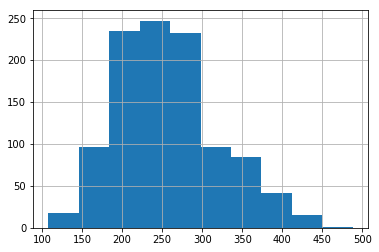

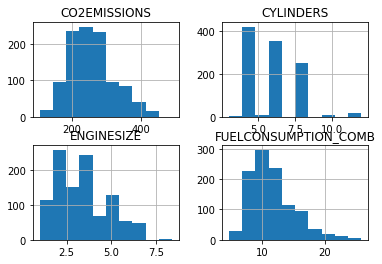

In [5]:
#Lets select some features to explore more.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz['CO2EMISSIONS'].hist()
plt.show()
viz.hist()
plt.show()

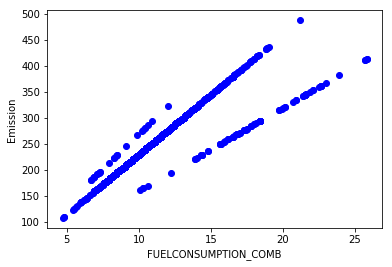

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

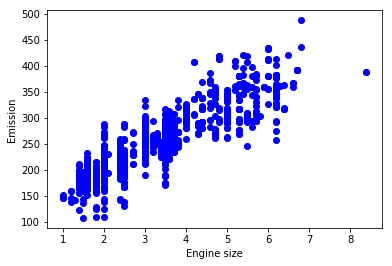

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

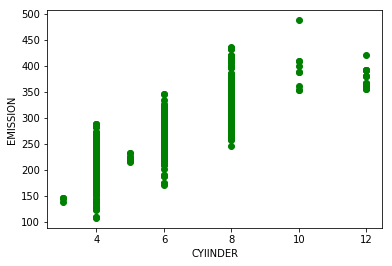

In [8]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="green")
plt.xlabel("CYlINDER")
plt.ylabel("EMISSION")
plt.show()

In [9]:
# train/test split
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

mask.shape
print(mask)
unique, counts = np.unique(mask, return_counts=True)
dict(zip(unique,counts))

[ True False  True ...  True  True  True]


{False: 214, True: 853}

In [10]:
from sklearn import linear_model


# tranfer the column of data frame into nd array to apply linear_model.LinearRegression().fit
train_x=np.asanyarray(train[['ENGINESIZE' ]])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
#import class of linearRegression
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)# find the coeficient and intercept of fitting line
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.0599669]]
Intercept:  [125.42356218]


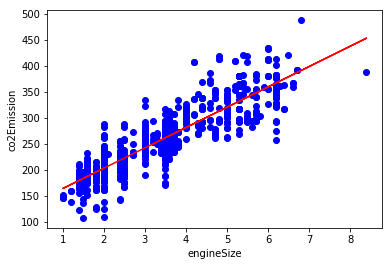

In [11]:
# show the fitting line and data of enginesize vs co2emmision
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.intercept_[0]+regr.coef_[0][0]* train_x,'-r'  )
plt.xlabel('engineSize')
plt.ylabel('co2Emission')
plt.show()


In [12]:
# evaluation of model

from sklearn.metrics import r2_score

# transfert column to nd array

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
# produire y_hat
test_y_hat=regr.predict(test_x)
print("Mean absolute error %.2f "%np.mean(np.absolute(test_y - test_y_hat)) )
print("Mean squared error %.2f " %np.mean((test_y - test_y_hat)**2) )
print("R² : %.2f " %r2_score(test_y_hat,test_y) )



Mean absolute error 25.26 
Mean squared error 1088.72 
R² : 0.62 
